### Importing Required Library

In [130]:
import pandas as pd
import numpy as np
import gzip
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data

In [97]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
            "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
            "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login",
            "is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate",
            "srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
            "dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
            "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]


#with gzip.open(r"C:\Users\UPLC\Documents\Final Year Project\Datasets_New\kddcup.data_10_percent.gz") as f:
f=r"C:\Users\UPLC\Documents\Final Year Project\Dataset\corrected.txt"
df=pd.read_csv(f,header=None,names=colnames)
df.head()    

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


### Performing Required Operations

In [98]:
df.shape

(311029, 42)

In [99]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
df['protocol_type'].value_counts()

icmp    164969
tcp     119357
udp      26703
Name: protocol_type, dtype: int64

In [101]:
icmp_df = df[df['protocol_type']=='icmp']
icmp_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,164969.0,164969.000000,164969.0,164969.0,164969.000000,164969.0,164969.0,164969.0,164969.0,164969.0,...,164969.000000,164969.000000,164969.000000,164969.000000,164969.000000,164969.000000,164969.000000,164969.0,164969.000000,164969.0
mean,0.0,862.940043,0.0,0.0,0.000582,0.0,0.0,0.0,0.0,0.0,...,253.950657,253.890719,0.998479,0.000241,0.998492,0.002126,0.000039,0.0,0.000163,0.0
std,0.0,537.356106,0.0,0.0,0.024116,0.0,0.0,0.0,0.0,0.0,...,15.688759,15.201978,0.035744,0.012179,0.035526,0.042310,0.003998,0.0,0.009830,0.0
min,0.0,8.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.0,520.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,0.0,1032.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,0.0,1032.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0
max,0.0,40008.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,0.990000,0.0,0.890000,0.0


In [102]:
tcp_df = df[df['protocol_type']=='tcp']
tcp_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,119357.000000,1.193570e+05,1.193570e+05,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.00000,119357.000000,...,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000,119357.000000
mean,45.807041,3.300125e+03,1.928290e+03,0.000075,0.000017,0.000134,0.038247,0.006158,0.44945,0.029299,...,206.495086,114.240145,0.472252,0.058968,0.033900,0.008866,0.153033,0.153202,0.370995,0.369235
std,651.905813,2.060622e+05,2.597889e+04,0.008683,0.004093,0.015853,0.502869,0.080553,0.49744,3.161192,...,87.809993,116.513589,0.463393,0.137526,0.141928,0.028389,0.353491,0.356375,0.473388,0.478523
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,207.000000,9.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,255.000000,20.000000,0.080000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.610000e+02,7.030000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.010000,0.000000,0.000000,0.000000,1.000000,1.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,1.000000,3.000000,101.000000,4.000000,1.00000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
udp_df = df[df['protocol_type']=='udp']
udp_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,26703.000000,26703.000000,26703.000000,26703.0,26703.000000,26703.0,26703.0,26703.0,26703.0,26703.0,...,26703.000000,26703.000000,26703.000000,26703.000000,26703.000000,26703.000000,26703.000000,26703.0,26703.000000,26703.0
mean,3.777815,88.312699,93.355690,0.0,0.005205,0.0,0.0,0.0,0.0,0.0,...,248.628132,241.007565,0.963002,0.025572,0.061874,0.000424,0.000201,0.0,0.002373,0.0
std,174.121564,29.947193,64.567231,0.0,0.123653,0.0,0.0,0.0,0.0,0.0,...,34.605341,50.941952,0.167286,0.113813,0.223115,0.010383,0.006841,0.0,0.031031,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.000000,54.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,255.000000,253.000000,0.990000,0.010000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,0.000000,105.000000,146.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,255.000000,254.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,0.000000,105.000000,146.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,255.000000,254.000000,1.000000,0.010000,0.010000,0.000000,0.000000,0.0,0.000000,0.0
max,20741.000000,516.000000,516.000000,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,0.770000,0.0,0.980000,0.0


### Listing out Important features of the dataset

In [104]:
features = ["duration","service","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]
target = "result"

In [79]:
icmp_df[features].head()

,duration,service,src_bytes,wrong_fragment,count,urgent,num_compromised,srv_count
818,0,eco_i,30,0,1,0,0,1
819,0,eco_i,30,0,1,0,0,1
820,0,eco_i,30,0,1,0,0,1
821,0,eco_i,30,0,1,0,0,1
833,0,ecr_i,30,0,1,0,0,1


In [105]:
icmp_df[target].value_counts()

smurf.        164091
normal.          378
ipsweep.         306
saint.           102
pod.              87
snmpguess.         3
multihop.          1
satan.             1
Name: result, dtype: int64

In [106]:
udp_df[target].value_counts()

normal.           16097
snmpgetattack.     7741
snmpguess.         2403
satan.              413
saint.               27
teardrop.            12
multihop.             8
udpstorm.             2
Name: result, dtype: int64

In [107]:
tcp_df[target].value_counts()

neptune.            58001
normal.             44118
mailbomb.            5000
guess_passwd.        4367
warezmaster.         1602
satan.               1219
back.                1098
mscan.               1053
apache2.              794
processtable.         759
saint.                607
portsweep.            354
httptunnel.           158
nmap.                  84
buffer_overflow.       22
sendmail.              17
named.                 17
ps.                    16
rootkit.               13
xterm.                 13
multihop.               9
land.                   9
xlock.                  9
xsnoop.                 4
ftp_write.              3
worm.                   2
phf.                    2
sqlattack.              2
loadmodule.             2
perl.                   2
imap.                   1
Name: result, dtype: int64

In [108]:
X=icmp_df.loc[:,features]
y=icmp_df.loc[:,target]

In [109]:
classes=np.unique(y)
print(classes)

['ipsweep.' 'multihop.' 'normal.' 'pod.' 'saint.' 'satan.' 'smurf.'
 'snmpguess.']


### Performing One-Hot Encoding

In [110]:
# Here we have replaced normal access requests with 0 and attack with 1
for i in range(len(classes)):
    if i==2:
        icmp_df=icmp_df.replace(classes[i],0)
    else:
        icmp_df=icmp_df.replace(classes[i],1)

In [111]:
# Converting continuous variables to categoricals values
icmp_df=icmp_df.replace("eco_i",-0.1)
icmp_df=icmp_df.replace("ecr_i",0.0)
icmp_df=icmp_df.replace("tim_i",0.1)
icmp_df=icmp_df.replace("urp_i",0.2)

In [112]:
icmp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
82,0,icmp,-0.1,SF,30,0,0,0,0,0,...,3,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0
156,0,icmp,0.0,SF,30,0,0,0,0,0,...,75,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0
406,0,icmp,0.0,SF,30,0,0,0,0,0,...,98,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0
629,0,icmp,0.0,SF,30,0,0,0,0,0,...,120,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0
767,0,icmp,-0.1,SF,30,0,0,0,0,0,...,2,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0


In [113]:
y=icmp_df.loc[:,target]

### Plotting some features using visualization tools

[]

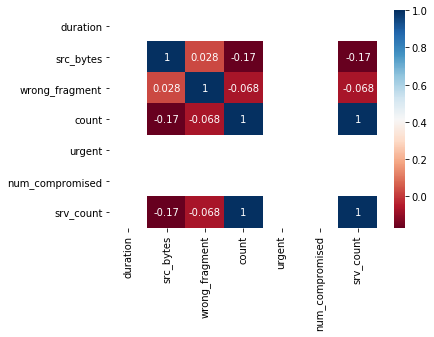

In [114]:
# Importing required library for plotting graph
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(X.corr(), annot=True,cmap="RdBu")
plt.plot()

In [115]:
X=icmp_df.loc[:,features]
y=icmp_df.loc[:,target]
X.head()

,duration,service,src_bytes,wrong_fragment,count,urgent,num_compromised,srv_count
82,0,-0.1,30,0,2,0,0,2
156,0,0.0,30,0,2,0,0,2
406,0,0.0,30,0,2,0,0,2
629,0,0.0,30,0,1,0,0,1
767,0,-0.1,30,0,3,0,0,1


In [116]:
print(list(X.loc[818,:]))

[0.0, 0.0, 1032.0, 0.0, 511.0, 0.0, 0.0, 511.0]


### Creating model using Machine Learning Algorithms

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [128]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers =["LR", "KNN","MLP","ID3"]
scores=list()

In [129]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n*==============***===============*")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of the model is:  99.93938291810632
Confusion Matrix:
 [[   81    25]
 [    5 49380]]
Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       106
           1       1.00      1.00      1.00     49385

   micro avg       1.00      1.00      1.00     49491
   macro avg       0.97      0.88      0.92     49491
weighted avg       1.00      1.00      1.00     49491


*==============***===============*
Accuracy of the model is:  99.99393829181064
Confusion Matrix:
 [[  104     2]
 [    1 49384]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       106
           1       1.00      1.00      1.00     49385

   micro avg       1.00      1.00      1.00     49491
   macro avg       1.00      0.99      0.99     49491
weighted avg       1.00      1.00      1.00     49491


*==============***===============*
Accuracy of the model is:  99.7939019215615
Confusion Matrix:
 [[ 

### Plotting Final Result

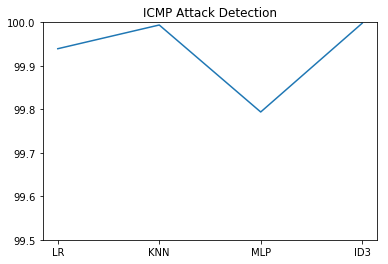

In [131]:
plt.plot(classifiers,scores)
plt.title("ICMP Attack Detection")
plt.ylim(99.5,100)
plt.show()